In [4]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
import shutil
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


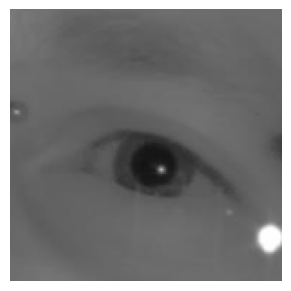

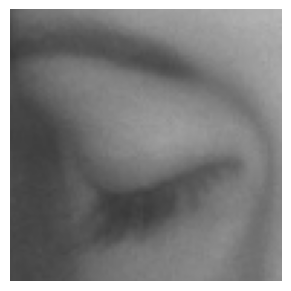

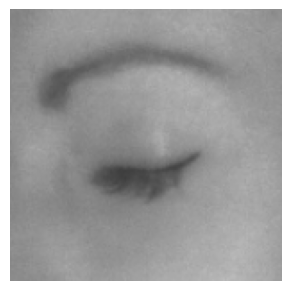

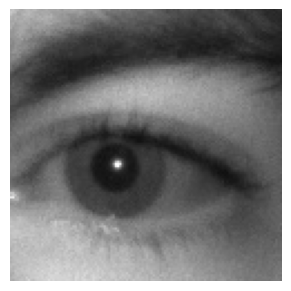

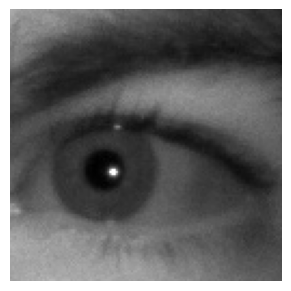

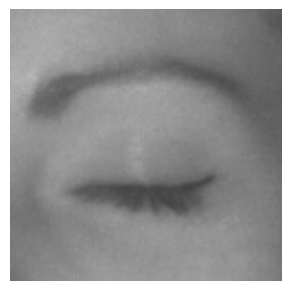

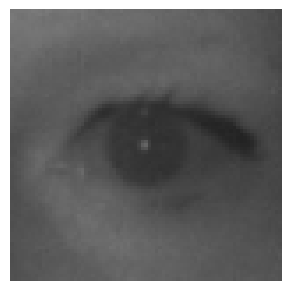

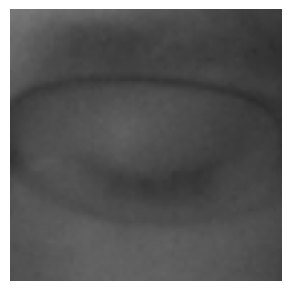

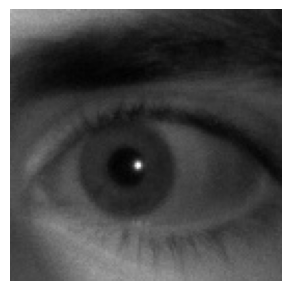

In [6]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [7]:
img_size = 84
batch_size = 32
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "binary",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "binary",
                                                   shuffle = True)

Found 4000 images belonging to 2 classes.
Found 1536 images belonging to 2 classes.


In [8]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [9]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [10]:
def model_fer_simple(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
    flatten = Flatten()(conv2)
    dense1 = Dense(128, activation='relu')(flatten)
    output = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
model = model_fer_simple((84,84,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 84, 84, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 82, 82, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 409600)            0         
                                                                 
 dense (Dense)               (None, 128)               52428928  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 52,447,873
Trainable params: 52,447,873
Non-tra

In [12]:
epochs = 10
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights2.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [13]:
history = model.fit(
                    x = train_generator,
                    steps_per_epoch = steps_per_epoch,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = validation_steps,
                    callbacks = callbacks)

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 62.1981 - accuracy: 0.7390
Epoch 1: saving model to model_weights2.h5
125/125 [==============================] - 120s 954ms/step - loss: 62.1981 - accuracy: 0.7390 - val_loss: 0.3591 - val_accuracy: 0.9121
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.4526 - accuracy: 0.8215
Epoch 2: saving model to model_weights2.h5
125/125 [==============================] - 117s 939ms/step - loss: 0.4526 - accuracy: 0.8215 - val_loss: 0.3877 - val_accuracy: 0.8906
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.2906 - accuracy: 0.9110
Epoch 3: saving model to model_weights2.h5
125/125 [==============================] - 117s 936ms/step - loss: 0.2906 - accuracy: 0.9110 - val_loss: 0.2502 - val_accuracy: 0.9108
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.1849 - accuracy: 0.9482
Epoch 4: saving model to model_weights2.h5
125/125 [============================

In [14]:
model.evaluate(validation_generator)

48/48 [==============================] - 4s 85ms/step - loss: 0.1013 - accuracy: 0.9661


[0.10128504037857056, 0.9661458134651184]

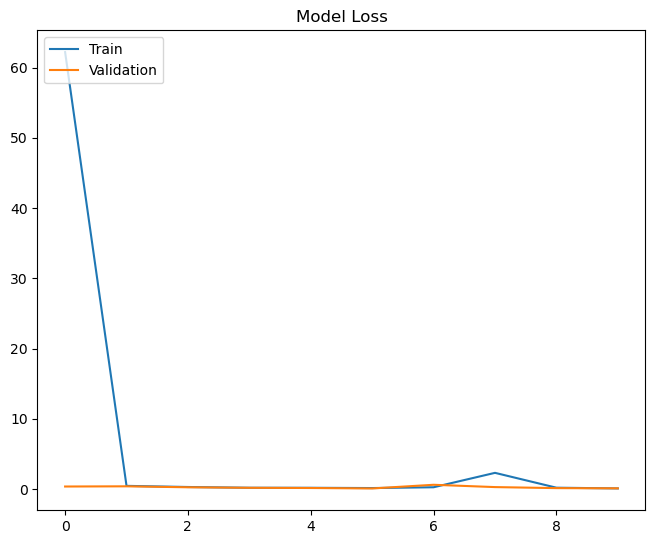

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

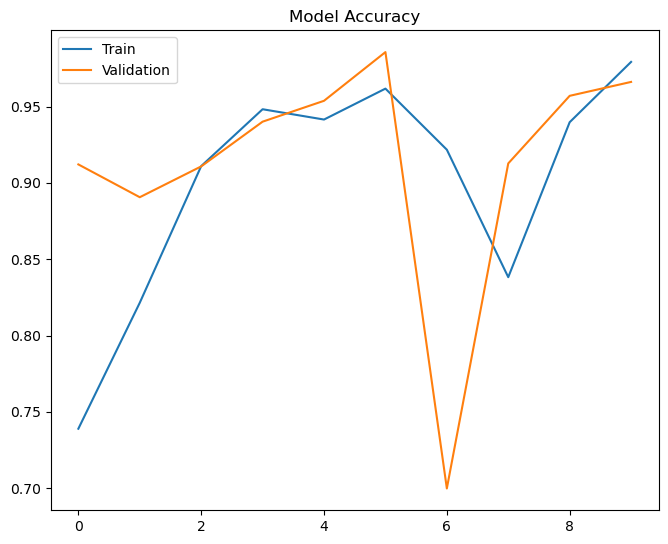

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [22]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)